# Lab 2.02 - Android Persistence

Import all necessary Python libraries and load the Android Persistence dataset from lab exercise 1.02.  Do not forget the conversion to categorical variables. Define an order in case of an ordinal variable.

In [53]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

Visualise the variables `DataSize` and `PersistenceType` separately using a suitable chart type.

In [54]:
data = pd.read_csv("..\\data\\android_persistence_cpu.csv", delimiter=';') 
data.head()

,Time,PersistenceType,DataSize
0,1.81,Sharedpreferences,Small
1,1.35,Sharedpreferences,Small
2,1.84,Sharedpreferences,Small
3,1.54,Sharedpreferences,Small
4,1.81,Sharedpreferences,Small


How often does each combination of `DataSize` and `PersistenceType` occur? Show the frequencies of `PersistenceType` (parameter `hue`), grouped according to `DataSize` (parameter `x`). Try it the other way round too!

DataSize
Small     120
Medium     90
Large      90
Name: count, dtype: int64
PersistenceType
GreenDAO             90
SQLLite              90
Realm                90
Sharedpreferences    30
Name: count, dtype: int64
PersistenceType    DataSize
GreenDAO           Large       30
                   Medium      30
                   Small       30
Realm              Large       30
                   Medium      30
                   Small       30
SQLLite            Large       30
                   Medium      30
                   Small       30
Sharedpreferences  Small       30
Name: count, dtype: int64


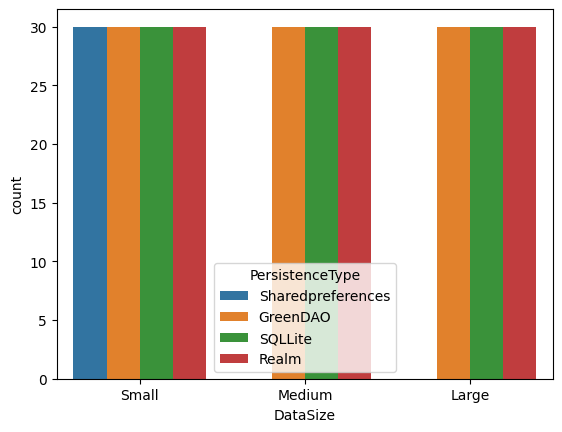

<Axes: xlabel='PersistenceType', ylabel='count'>

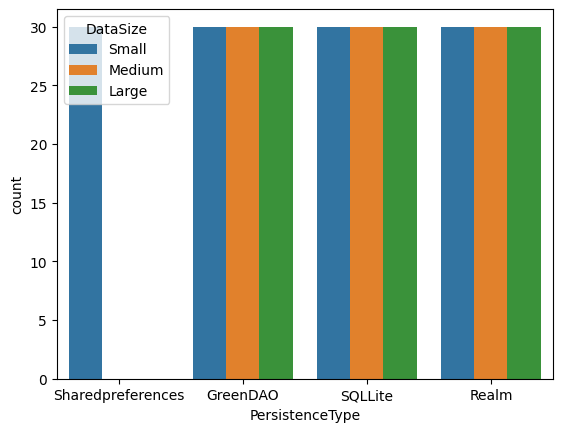

In [55]:
print(data["DataSize"].value_counts())
print(data["PersistenceType"].value_counts())
print(data[["PersistenceType", "DataSize" ]].value_counts())

sns.countplot(data=data, x="DataSize", hue="PersistenceType")
plt.show()
sns.countplot(data=data, x="PersistenceType", hue="DataSize")

Visualise the variable `Time` with a boxplot, each time with more detail. Do you notice how you get a better view of the data each time you do this?

- First over the entire dataset (parameter `x`)
- Then grouped according to `DataSize` (parameter `y`)
- Finally, split it according to `PersistenceType` (parameter `hue`)

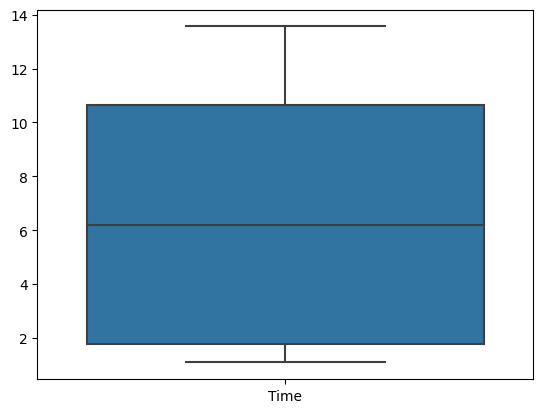

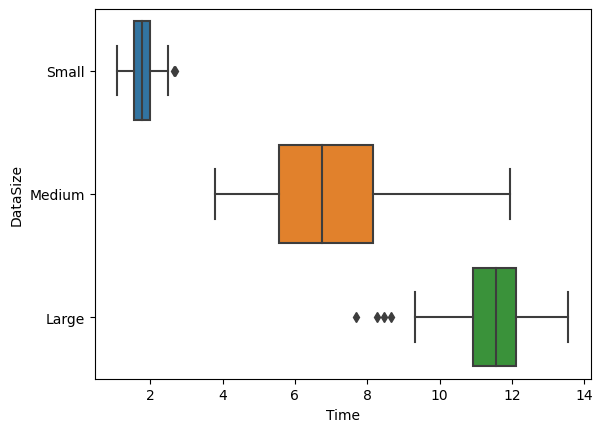

<Axes: xlabel='Time', ylabel='DataSize'>

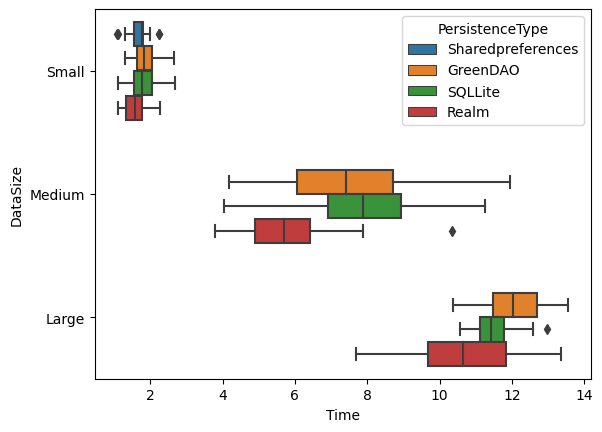

In [56]:
sns.boxplot(data=data)
plt.show()
sns.boxplot(data=data, x="Time", y="DataSize")
plt.show()
sns.boxplot(data=data, x="Time", y="DataSize", hue="PersistenceType")

**(Challenge)** Try to do something similar with a density graph: for each value of `DataSize`, show a scatter diagram showing a density graph of the variable `Time` for each value of `PersistenceType` (tip: `sns.FacetGrid()`). The result may look something like this:

![Density graphs for each `DataSize`, comparing the performance of different `PersistenceTypes`](img/persistence-density.png)

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


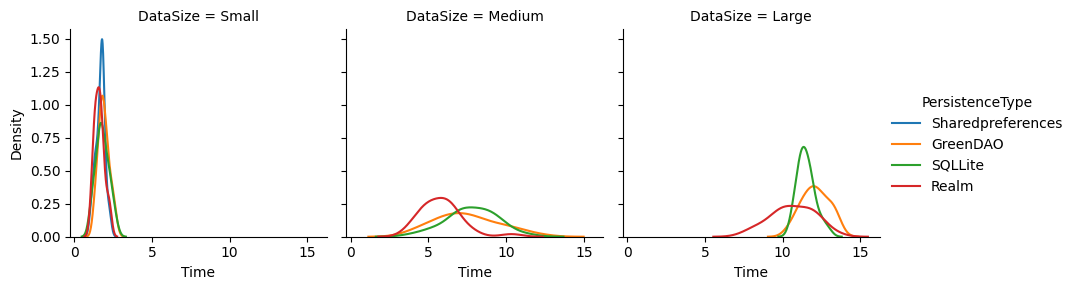

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


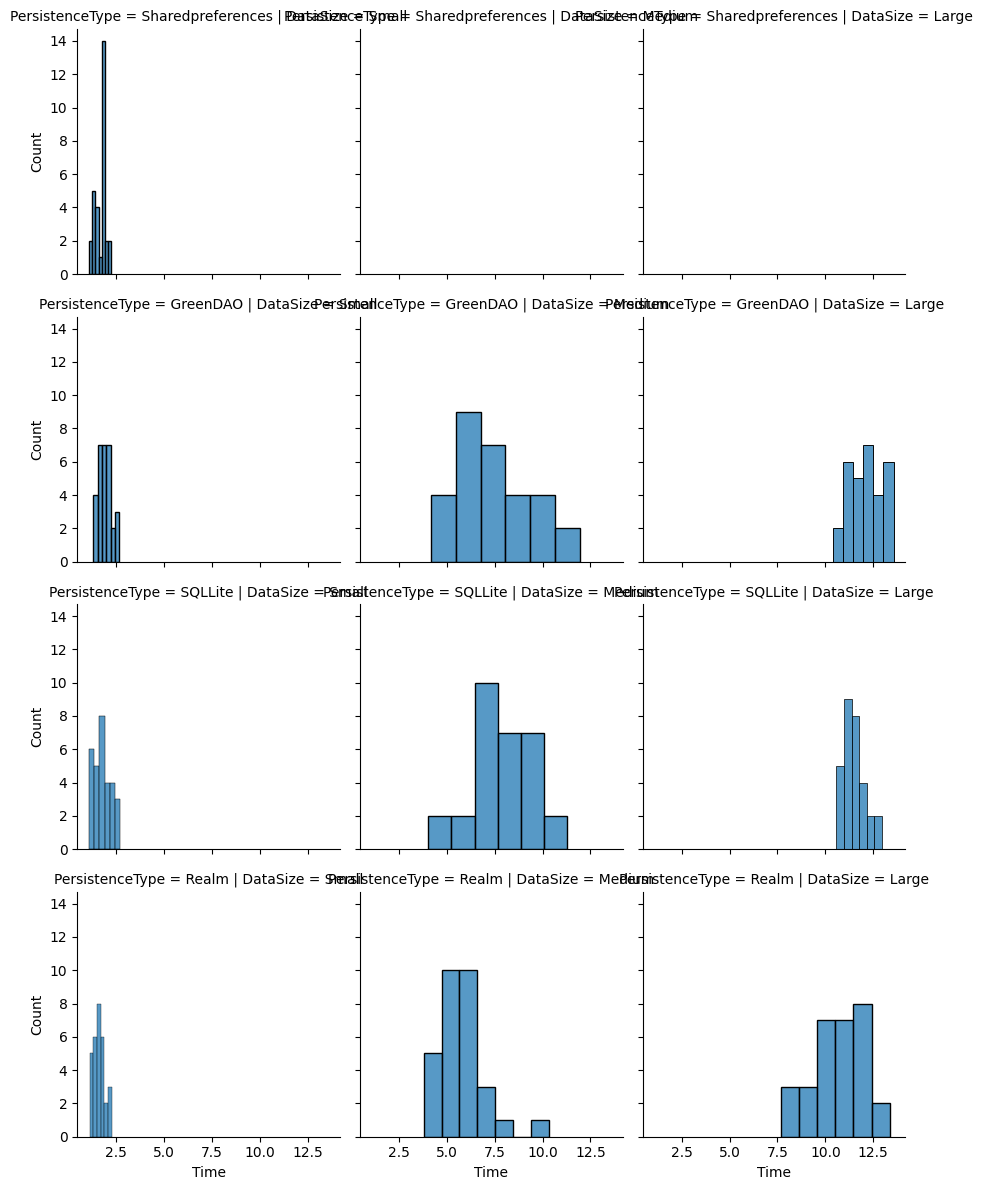

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


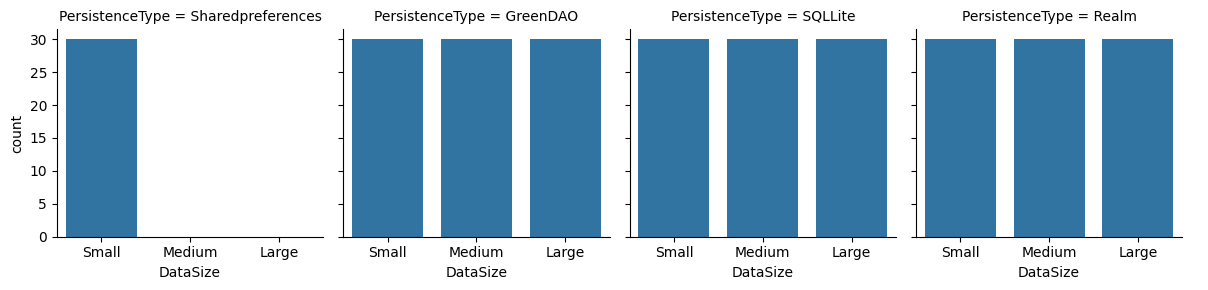

In [82]:
# Assuming 'data' is your DataFrame
g = sns.FacetGrid(data=data, col="DataSize",  hue="PersistenceType")
g.map_dataframe(sns.kdeplot, x="Time")
g.add_legend()
plt.show()

g = sns.FacetGrid(data=data, col="DataSize",  row="PersistenceType")
g.map_dataframe(sns.histplot, x="Time")
g.add_legend()
plt.show()

# Assuming 'data' is your DataFrame
g = sns.FacetGrid(data=data, col="PersistenceType" )
g.map_dataframe(sns.countplot, x="DataSize")
g.add_legend()
plt.show()

Calculate sample mean and standard deviation of `Time`.

- Across the whole dataset
- Broken down according to `DataSize`
- Broken down according to `PersistenceType`
- Broken down according to `DataSize` and `PersistenceType`

In [98]:
print(data.Time.mean().round(3))
print(data.groupby("DataSize")['Time'].mean().round(3))
print(data.groupby("PersistenceType")['Time'].mean().round(3))
print(data.groupby(["DataSize", "PersistenceType", ])['Time'].mean().round(3))

print(data.groupby("DataSize")['Time'].std().round(3))
print(data.groupby("PersistenceType")['Time'].std().round(3))
print(data.groupby(["DataSize", "PersistenceType", ])['Time'].std().round(3))

6.231
DataSize
Large     11.426
Medium     7.022
Small      1.741
Name: Time, dtype: float64
PersistenceType
GreenDAO             7.153
Realm                6.023
SQLLite              7.036
Sharedpreferences    1.674
Name: Time, dtype: float64
DataSize  PersistenceType  
Large     GreenDAO             12.110
          Realm                10.652
          SQLLite              11.515
Medium    GreenDAO              7.454
          Realm                 5.818
          SQLLite               7.794
Small     GreenDAO              1.894
          Realm                 1.599
          SQLLite               1.799
          Sharedpreferences     1.674
Name: Time, dtype: float64
DataSize
Large     1.164
Medium    1.864
Small     0.359
Name: Time, dtype: float64
PersistenceType
GreenDAO             4.386
Realm                3.884
SQLLite              4.146
Sharedpreferences    0.285
Name: Time, dtype: float64
DataSize  PersistenceType  
Large     GreenDAO             0.868
          Realm      

## Expected results

As a check, you can find the expected results here (max. 3 decimal places):

| Statistic         | Mean   | Standard deviation |
| :---------------- | :----- | :----------------- |
| Whole dataset     | 6.231  | 4.230              |
| Small             | 1.741  | 0.359              |
| Medium            | 7.022  | 1.864              |
| Large             | 11.426 | 1.164              |
| GreenDAO          | 7.152  | 4.386              |
| Realm             | 6.023  | 3.884              |
| SQLite            | 7.036  | 4.146              |
| SharedPreferences | 1.674  | 0.285              |

Split on both criteria:

| Sample mean       | Small | Medium | Large  |
| :---------------- | :---- | :----- | :----- |
| GreenDAO          | 1.894 | 7.454  | 12.110 |
| Realm             | 1.599 | 5.818  | 10.652 |
| SQLite            | 1.799 | 7.794  | 11.515 |
| SharedPreferences | 1.674 | -      | -      |

| Standard deviation | Small | Medium | Large |
| :----------------- | :---- | :----- | :---- |
| GreenDAO           | 0.348 | 2.007  | 0.868 |
| Realm              | 0.315 | 1.331  | 1.406 |
| SQLite             | 0.416 | 1.599  | 0.559 |
| SharedPreferences  | 0.285 | -      | -     |
